In [97]:
import numpy as np
import torch
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
table = pd.read_csv("/workspace/G_Project/DEAP_Dataset/EEG_label/EEG_label.csv")

In [93]:
def get_5fold(label_path):
    label = pd.read_csv(label_path)
    label = pd.concat([label for i in range(1)]).sort_values(by="Unnamed: 0").reset_index(drop=True)
    trial = label.iloc[:,0].str.split("_trial").str[1].astype('int64')
    test_indexes = [
        ([idx for idx in range(len(trial)) if trial[idx] not in range(1, 9)], [idx for idx in range(len(trial)) if trial[idx] in range(1, 9)]),
        ([idx for idx in range(len(trial)) if trial[idx] not in range(9, 17)], [idx for idx in range(len(trial)) if trial[idx] in range(9, 17)]),
        ([idx for idx in range(len(trial)) if trial[idx] not in range(17, 25)], [idx for idx in range(len(trial)) if trial[idx] in range(17, 25)]),
        ([idx for idx in range(len(trial)) if trial[idx] not in range(25, 33)], [idx for idx in range(len(trial)) if trial[idx] in range(25, 33)]),
        ([idx for idx in range(len(trial)) if trial[idx] not in range(33, 41)], [idx for idx in range(len(trial)) if trial[idx] in range(33, 41)])]
    
    return trial, test_indexes

In [94]:
trial, test_indexes = get_5fold("/workspace/G_Project/DEAP_Dataset/EEG_label/EEG_label.csv")

In [103]:
table.valence

0       7.71
1       8.10
2       8.58
3       4.94
4       6.96
        ... 
1275    3.91
1276    2.81
1277    3.05
1278    3.99
1279    7.15
Name: valence, Length: 1280, dtype: float64

Text(0, 0.5, '#. of data')

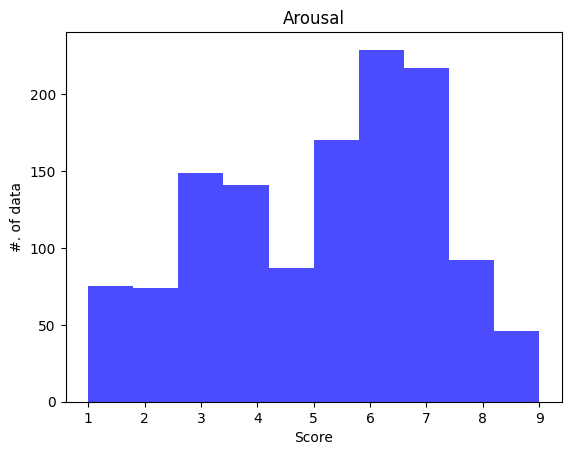

In [108]:
plt.hist(table.arousal, color="blue", alpha=0.7)
plt.title("Arousal")
plt.xlabel("Score")
plt.ylabel("#. of data")

In [74]:
pd.concat([table for i in range(6)]).sort_values(by="Unnamed: 0").reset_index(drop=True)

,Unnamed: 0,valence,arousal
0,s01_trial01,7.71,7.60
1,s01_trial01,7.71,7.60
2,s01_trial01,7.71,7.60
3,s01_trial01,7.71,7.60
4,s01_trial01,7.71,7.60
...,...,...,...
7675,s32_trial40,7.15,4.03
7676,s32_trial40,7.15,4.03
7677,s32_trial40,7.15,4.03
7678,s32_trial40,7.15,4.03


In [56]:
len(train_idx)

1024

In [35]:
class Calculator():
    def __init__(self, cal_type, penalty=1, n_classes=9):
        self.cal_type = cal_type
        self.penalty = penalty
        self.interval_length = 12 // n_classes
    def calculate(self, probs):
        if self.cal_type == "Expectation":
            return self.expectation(probs)
        elif self.cal_type == "Bernoulli":
            return self.bernoulli(probs)
    def expectation(self, probs):
        return torch.sum(torch.tensor(range(1,10,self.interval_length)).to(probs.device)*probs, 1)
    def bernoulli(self, probs):
        return torch.sum(torch.tensor(range(1,10,self.interval_length)).to(probs.device)*probs - self.penalty*(1-probs)*probs, 1)

In [36]:
CAL = Calculator(cal_type="Expectation", n_classes=3)

In [37]:
CAL.calculate(torch.tensor([[0, 0, 1]]))

tensor([9])